In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
np.random.seed(42)
synthetic_data = pd.DataFrame({
    'gender': np.random.choice(['Female', 'Male'], size=100),
    'age': np.random.choice(['Adult', 'Young'], size=100),
    'foreign_worker': np.random.choice(['Foreign', 'Native'], size=100),
    'class': np.random.choice(['Good', 'Bad'], size=100),
    'value': np.random.randint(1, 100, size=100)
})


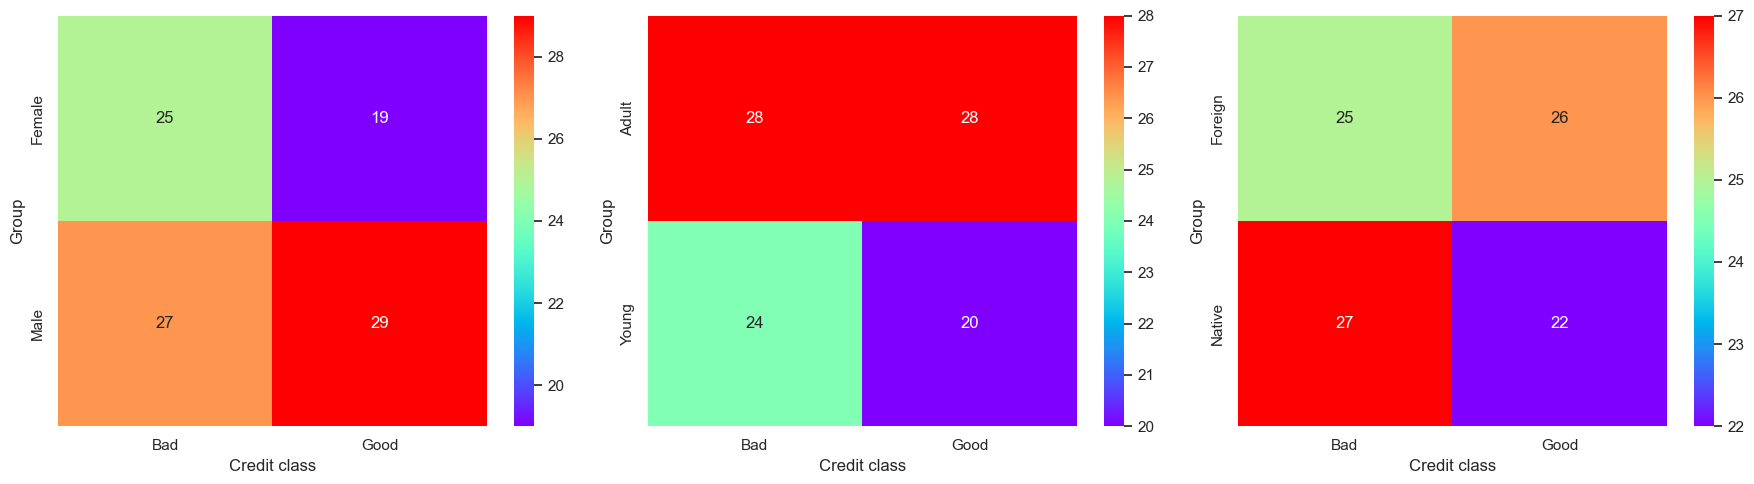

In [12]:
def plot_heatmap(data, groupby_col, ax):
    cf_comp = data.groupby([groupby_col, 'class']).size().unstack(fill_value=0)
    ax = sns.heatmap(cf_comp, annot = True, cmap='rainbow', ax=ax, fmt='d')
    ax.set_xticklabels(["Bad", "Good"])
    if groupby_col == "gender":
        ax.set_yticklabels(["Female", "Male"])
    elif groupby_col == "age":
        ax.set_yticklabels(["Adult", "Young"])
    elif groupby_col == "foreign_worker":
        ax.set_yticklabels(["Foreign", "Native"])    
    ax.set_xlabel("Credit class")
    ax.set_ylabel("Group")

                        
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
groupby_cols = ['gender', 'age', 'foreign_worker']
                        
for i, groupby_col in enumerate(groupby_cols):
    plot_heatmap(synthetic_data, groupby_col, axes[i])
                        
plt.tight_layout()
plt.show()

In [28]:
#process dataset to use apriori algorithm
processed = synthetic_data.to_numpy().tolist()
processed = [[str(i) for i in transaction] for transaction in processed]

In [23]:
from apyori import apriori

In [65]:
results = apriori(processed, min_support=0.3, min_confidence = 0.2)

In [66]:
result_list = list(results)

In [85]:
#extract rules
rules = []
for i in result_list:
    for ordered_stat in i.ordered_statistics:
        if ordered_stat.items_base:
            rule = {
                'base' : ordered_stat.items_base,
                'add' : ordered_stat.items_add,
                'support' : i.support,
                'confidence': ordered_stat.confidence,
                'lift' : ordered_stat.lift
            }
            rules.append(rule)

In [87]:
rules

[{'base': frozenset({'Adult'}),
  'add': frozenset({'Male'}),
  'support': 0.31,
  'confidence': 0.5535714285714285,
  'lift': 0.988520408163265},
 {'base': frozenset({'Male'}),
  'add': frozenset({'Adult'}),
  'support': 0.31,
  'confidence': 0.5535714285714285,
  'lift': 0.988520408163265}]

In [82]:
for rule in rules:
    base = ', '.join(map(str, rule['base']))
    add = ', '.join(map(str, rule['add']))
    print(f"Rule: {base} -> {add}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("")


Rule: Adult -> Male
Support: 0.31
Confidence: 0.5535714285714285
Lift: 0.988520408163265

Rule: Male -> Adult
Support: 0.31
Confidence: 0.5535714285714285
Lift: 0.988520408163265

